### Задание
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. 
Данные нейросети:
- три входа $(x_{1}, x_{2}, x_{3})$;
- три нейрона в скрытых слоях $(h_{1}, h_{2}, h_{3})$;
- выход $(o_{1})$.

Нейроны имеют идентичные веса и пороги:
- $w = [0.5, 0.5, 0.5]$;
- $b = 0$.

In [7]:
def sigmoid(x):
    # функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedForward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias # np.dot - умножение матриц
        return round(sigmoid(total), 3)

In [9]:
import numpy as np



class OurNeuralNetwork1:
    '''
    Данные нейросети: 
        - два входа;
        - два нейрона в скрытых слоях (h1, h2);
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1];
        - b = 0.
    '''
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0 # порог
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias) 
        self.h3 = Neuron(weights, bias)        
        self.o1 = Neuron(weights, bias)  
    def feedForward(self, x):
        out_h1 = self.h1.feedForward(x)
        out_h2 = self.h2.feedForward(x)   
        out_h3 = self.h3.feedForward(x)   
        # Входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedForward(np.array([out_h1, out_h2, out_h3]))
        return round(out_o1, 3)
    
network = OurNeuralNetwork1()
x = np.array([2, 3, 4])
print(network.feedForward(x)) # 0.8151036049051821

0.815


Данные нейросети:
- два входа $(x_{1}, x_{2})$;
- два нейрона в скрытых слоях  $(h_{1}, h_{2}$);
- два выхода $(o_{1}, o_{2})$.

Нейроны имеют идентичные веса и пороги:
- $w = [1, 0]$;
- $b = 1$.

In [10]:
import numpy as np
class OurNeuralNetwork2:

    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)        
        self.o1 = Neuron(weights, bias)  
        self.o2 = Neuron(weights, bias)  
    def feedForward(self, x):
        out_h1 = self.h1.feedForward(x)
        out_h2 = self.h2.feedForward(x)   
        # Входы для о1 - это выхода h1 и h2
        out_o1 = self.o1.feedForward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedForward(np.array([out_h1, out_h2]))
        return round(out_o1, 3), round(out_o2, 3)
    
network = OurNeuralNetwork2()
x = np.array([2, 3])
print(network.feedForward(x)) # 0.7216325609518421

(0.876, 0.876)


## Задание 
Реализуйте классы нейронных сетей с использованием других функций 
активации.


2. Функция активации - гиперболический тангенс. 

Достоинства:
- простое вычисление производной через  значение своей функции;
- область значений от -1 до 1.  

Недостатки:
- затухание или увеличение градиента;
- ресурсовемкая по сравнению с ReLU.
$$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

In [11]:
from math import exp
import numpy as np

def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedForward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias # np.dot - умножение матриц
        return tanh(total)
    
class TanhNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)        
        self.o1 = Neuron(weights, bias)  
        self.o2 = Neuron(weights, bias)  
    def feedForward(self, x):
        out_h1 = self.h1.feedForward(x)
        out_h2 = self.h2.feedForward(x)   
        # Входы для о1 - это выхода h1 и h2
        out_o1 = self.o1.feedForward(np.array([out_h1, out_h2]))
        return round(out_o1, 3)
    
network = TanhNeuralNetwork()
x = np.array([2, 3])
print(network.feedForward(x)) # 0.964

0.964


3. Функция активации - выпрямленная линейная функция активации ReLU (rectified linear unit).

Достоинства:
- лишена ресурсоемких операций;
- отсекает ненужные детали;
- отсутствует разрастание/затухание градиента;
- быстрое обучение.

Недостатки:
- не всегда надежна, в процессе обучения может "умирать";
- сильно зависима от инициализации весов.

$$f(x) = max(0, x)$$

In [12]:
from math import exp
import numpy as np

def relu(x):
    return max(0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedForward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias # np.dot - умножение матриц
        return relu(total)
    
class ReluNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)        
        self.o1 = Neuron(weights, bias)  
        self.o2 = Neuron(weights, bias)  
    def feedForward(self, x):
        out_h1 = self.h1.feedForward(x)
        out_h2 = self.h2.feedForward(x)   
        # Входы для о1 - это выхода h1 и h2
        out_o1 = self.o1.feedForward(np.array([out_h1, out_h2]))
        return round(out_o1, 3)
    
network = ReluNeuralNetwork()
x = np.array([2, 3])
print(network.feedForward(x)) # 4

4


## Задание
Используйте классы MLPClassified и MLPRegressor для классификации и 
регрессии произвольных данных из интернета. Проведите анализ 
атрибуты, полученных моделей.  
Для классификации можете взять набор данных ирисов,
а для регрессии датасет зависимости заработной платы от опыта работы.

### Классификация

In [13]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    # посколько iris - pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки (независимые переменные - х)
    iris.iloc[:, -1], # последнюю в целевую переменную (зависимая переменная - у)
    test_size = 0.20, # размер тестовой выборки 20% 
    stratify=iris.iloc[:, -1], # было Y_digits
    random_state=123
)

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print("Первые 15 предсказаний/значений тестовой выборки:")
print(Y_preds[:15])
print(Y_test[:15])

# метод Score для оценки точности моделей классификации
print('Точность тестовой выборки: ', round(mlp_classifier.score(X_test, Y_test), 3))
print('Точность обучающей выборки: ', round(mlp_classifier.score(X_train, Y_train), 3))

Первые 15 предсказаний/значений тестовой выборки:
['versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'virginica']
80     versicolor
45         setosa
144     virginica
110     virginica
38         setosa
2          setosa
135     virginica
72     versicolor
138     virginica
34         setosa
19         setosa
77     versicolor
101     virginica
63     versicolor
117     virginica
Name: species, dtype: object
Точность тестовой выборки:  0.933
Точность обучающей выборки:  0.983


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


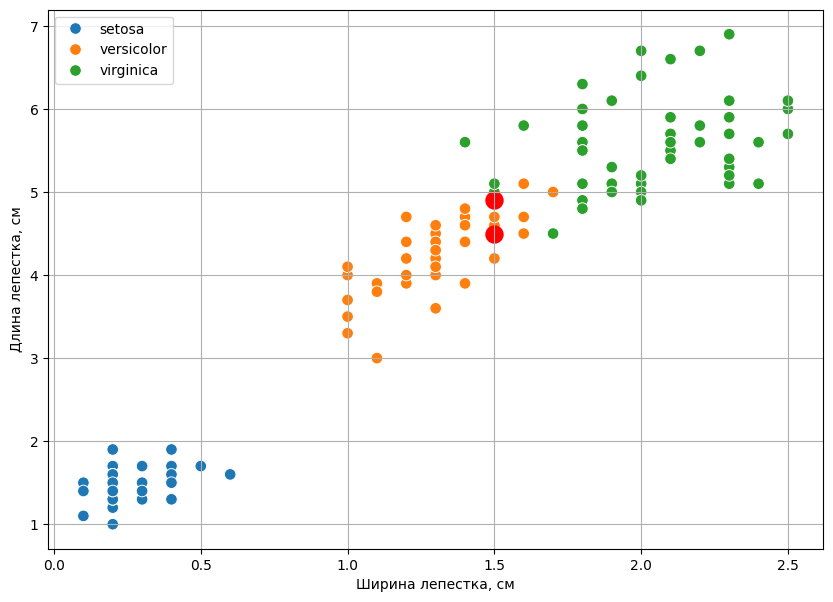

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Покажем на графике, что отражает полученное число.
# Красным цветом обозначены точки, для которых классификация сработала неправильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.legend(loc=2) # loc отвечает за угол, в котором расположена легенда
plt.grid()

# Перебираем все объекты из теста
for i in range(len(Y_test)):
    # Если предсказание неправильное
    if np.array(Y_test)[i] != Y_preds[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [16]:
# Качество модели (доля правильно классифицированных точек)
from sklearn.metrics import accuracy_score
print(f'Точность предсказания: {accuracy_score(Y_test, Y_preds) :.3}')

Точность предсказания: 0.933


In [17]:
print('Убыток: ', round(mlp_classifier.loss_, 3))
print('Количество весов: ', len(mlp_classifier.coefs_))
print('Количество значений смещений: ', len(mlp_classifier.intercepts_))
print('Количество итераций, для которых выполнялась оценка: ', mlp_classifier.n_iter_)
print('Имя функции активации выходного слоя: ', mlp_classifier.out_activation_)

Убыток:  0.299
Количество весов:  2
Количество значений смещений:  2
Количество итераций, для которых выполнялась оценка:  200
Имя функции активации выходного слоя:  softmax


### Регрессия

In [18]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
dataframe.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


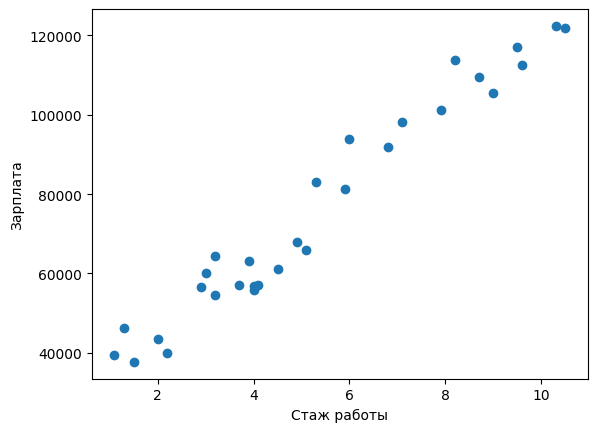

In [19]:
plt.scatter(dataframe['YearsExperience'], dataframe['Salary'], label = 'Соотношение стажа работы и зарплаты')
plt.xlabel("Стаж работы")
plt.ylabel("Зарплата")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Размеры обучающей и тестовой выборок: ")
print('Обучающая: ', X_train.shape, Y_train.shape)
print('Тестовая: ', X_test.shape, Y_test.shape)

Размеры обучающей и тестовой выборок: 
Обучающая:  (24, 1) (120,)
Тестовая:  (6, 1) (30,)


In [21]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=100000)
# regressor = MLPRegressor(random_state=123)
regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=100000)

In [22]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
print('Коэффициент детерминации R2:', r2_score(y_test, y_pred))

Коэффициент детерминации R2: 0.988170030190305


В этом примере мы использовали MLPRegressor с двумя скрытыми слоями, функцией активации ReLU и оптимизатором Adam. Также мы оценили качество модели с помощью коэффициента детерминации (R2 Score).

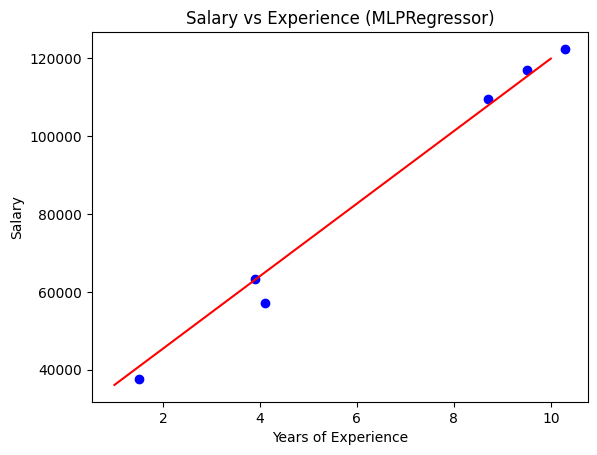

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Создание набора значений для оси X
X_plot = np.linspace(1, 10, 100).reshape(-1, 1)

# Получение предсказанных значений на наборе X_plot
y_pred_plot = regressor.predict(X_plot)

# Построение графика
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_plot, y_pred_plot, color='red')
plt.title('Salary vs Experience (MLPRegressor)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
print('Убыток: ', round(regressor.loss_, 3))
print('Количество весов: ', len(regressor.coefs_))
print('Количество значений смещений: ', len(regressor.intercepts_))
print('Количество итераций, для которых выполнялась оценка: ', regressor.n_iter_)
print('Имя функции активации выходного слоя: ', regressor.out_activation_)

Убыток:  18074835.072
Количество весов:  3
Количество значений смещений:  3
Количество итераций, для которых выполнялась оценка:  17271
Имя функции активации выходного слоя:  identity
